# Homework #7

**Due by midnight on Friday March 22, 2019**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


Name: Adam Ten Hoeve

## A. Theoretical Problems: None this week. Use this time to work on projects!

## B. Computational Problems

### Problem B.1

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study of 768 adult female Pima Indians living near Phoenix, AZ. The purpose of the study was the investigate factors related to diabetes.

#### (a) Perform simple graphical and numerical summaries of the data. Can you find any obvious irregularities in the data? If so, take appropriate steps to correct these problems.

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

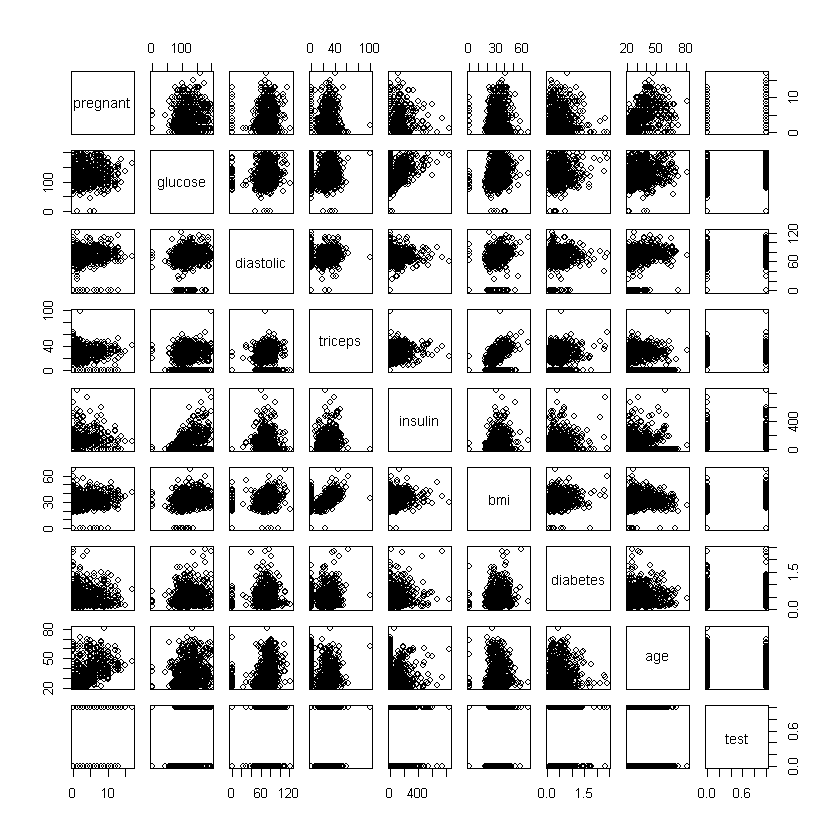

In [29]:
library(faraway) 
data(pima)
summary(pima)
par(mfrow = c(2,2)); plot(pima)

Note from the summary that the glucose, diastolic, triceps, insulin and BMI columns all have minimum values of 0. That can't be healthy, so the zero is probably a stand-in for missing data. So let's change the values to actually missing.

In [30]:
pima$glucose[pima$glucose == 0] <- NA
pima$diastolic[pima$diastolic == 0] <- NA
pima$triceps[pima$triceps == 0] <- NA
pima$insulin[pima$insulin == 0] <- NA
pima$bmi[pima$bmi == 0] <- NA

pima = na.omit(pima)

And because the test varaible is only 0 or 1, based on if they tested positive for diabetes, we can treat that variable as a factor.

In [31]:
pima$test <- as.factor(pima$test)
levels(pima$test) <- c("negative", "positive")
summary(pima$test)

negative positive 
     262      130

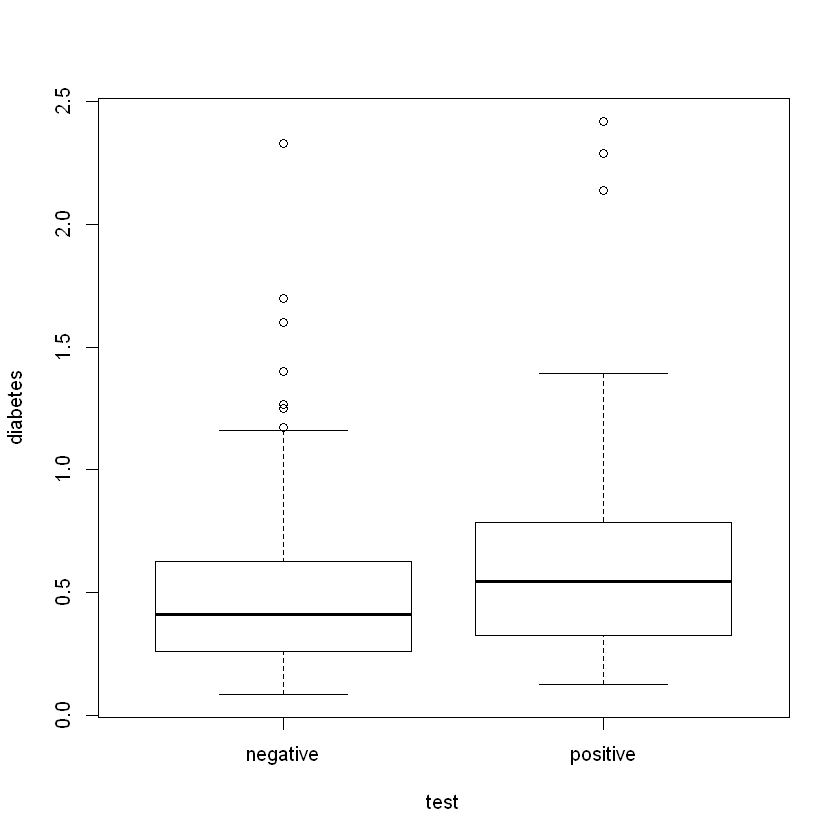

In [32]:
plot(diabetes ~ test, data = pima)

#### (b) Fit a model with the result of the diabetes test as the response and all the other variables as predictors. Can you tell whether this model fits the data?

In [33]:
glmod = glm(test ~ ., data = pima, family = binomial)
summary(glmod)


Call:
glm(formula = test ~ ., family = binomial, data = pima)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7823  -0.6603  -0.3642   0.6409   2.5612  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.004e+01  1.218e+00  -8.246  < 2e-16 ***
pregnant     8.216e-02  5.543e-02   1.482  0.13825    
glucose      3.827e-02  5.768e-03   6.635 3.24e-11 ***
diastolic   -1.420e-03  1.183e-02  -0.120  0.90446    
triceps      1.122e-02  1.708e-02   0.657  0.51128    
insulin     -8.253e-04  1.306e-03  -0.632  0.52757    
bmi          7.054e-02  2.734e-02   2.580  0.00989 ** 
diabetes     1.141e+00  4.274e-01   2.669  0.00760 ** 
age          3.395e-02  1.838e-02   1.847  0.06474 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 344.02  on 383  degrees of freedom
AIC: 362.02

Number of F

#### (c) What is the difference in the odds of testing positive for diabetes for a woman with a BMI at the first quartile compared with a woman at the third quartile, assuming all other factors are held constant? Give a confidence interval for this difference.

In [116]:
# Get the first and third quantile values for the bmi
quantiles = quantile(pima$bmi, c(0.25, 0.75))

# Set new testing data, one with low BMI and one with high BMI
# All numbers are taken from the median values, except for the bmi values
lowBMI = data.frame(pregnant = 2, glucose = 119, diastolic = 70, triceps = 29, insulin = 125.5, diabetes = 0.4495, age = 27, bmi = as.numeric(quantiles[1]))
highBMI = data.frame(pregnant = 2, glucose = 119, diastolic = 70, triceps = 29, insulin = 125.5, diabetes = 0.4495, age = 27, bmi = as.numeric(quantiles[2]))

# Predict the likelihood of testing positive for each bmi
lowBMIProb = predict(glmod, lowBMI, type = "response")
lowBMIOdds = lowBMIProb / (1 - lowBMIProb)
highBMIProb = predict(glmod, highBMI, type = "response")
highBMIOdds = highBMIProb / (1 - highBMIProb)

# Calculate the odds ratio between the low and high BMI groups
OddsRatio = as.numeric(lowBMIOdds) / as.numeric(highBMIOdds)
OddsRatio
# Convert odds to log-outs so it has a normal distribution
logOR = log(OddsRatio)
SE = sqrt(1/a + 1/b + 1/c + 1/d)

lower = logOR - 1.96*SE
upper = logOR + 1.96*SE
# Convert log limits back to normal scale for odds ratios
CI = c(exp(lower), exp(upper))
# CI = c(lower, upper)
CI

[1] 0.5413567

[1] 0.2656901 1.1030407

We get a difference in odds of 0.541, with a confidence interval of 0.266 to 1.103.

#### (d) Do women who test positive have higher diastolic blood pressures? Is the diastolic blood pressure significant in the regression model? Explain the distinction between the two questions and discuss why the answers are only apparently contradictory.

In [97]:
pos = pima[which(pima$test == "positive"), ]
neg = pima[which(pima$test == "negative"), ]

t.test(pos$diastolic, neg$diastolic)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   66.50   74.00   74.08   82.00  110.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   60.00   70.00   68.97   76.00  106.00 


	Welch Two Sample t-test

data:  pos$diastolic and neg$diastolic
t = 3.761, df = 237.75, p-value = 0.0002131
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.432216 7.782699
sample estimates:
mean of x mean of y 
 74.07692  68.96947 


From the t-test for the difference of means, we can see that there is a statistically significant difference between women who test positive and negative because the confidence interval does not cover zero. However, in the GLM, the estimate for diastolic blood pressure is not significant with a p-value of 0.904. Although it appears these conclusions contradict each other, it is important to realize that these are two different questions. The first is comparing the diastolic blood pressures between people who do and do not have diabetes, and the second is asking if diastolic blood pressure is a significant determiner of diabetes. In this way, they are testing different things. It could be possible that having a low vs. high diastolic blood pressure has little effect on the development of diabetes, but having diabetes leads has significant evidence of leading to high blood pressure. This would explain the apparent contradion of these two statistical conclustions.

#### (e) Perform diagnostics on the regression model, reporting any potential violations and any suggested improvements to the model.

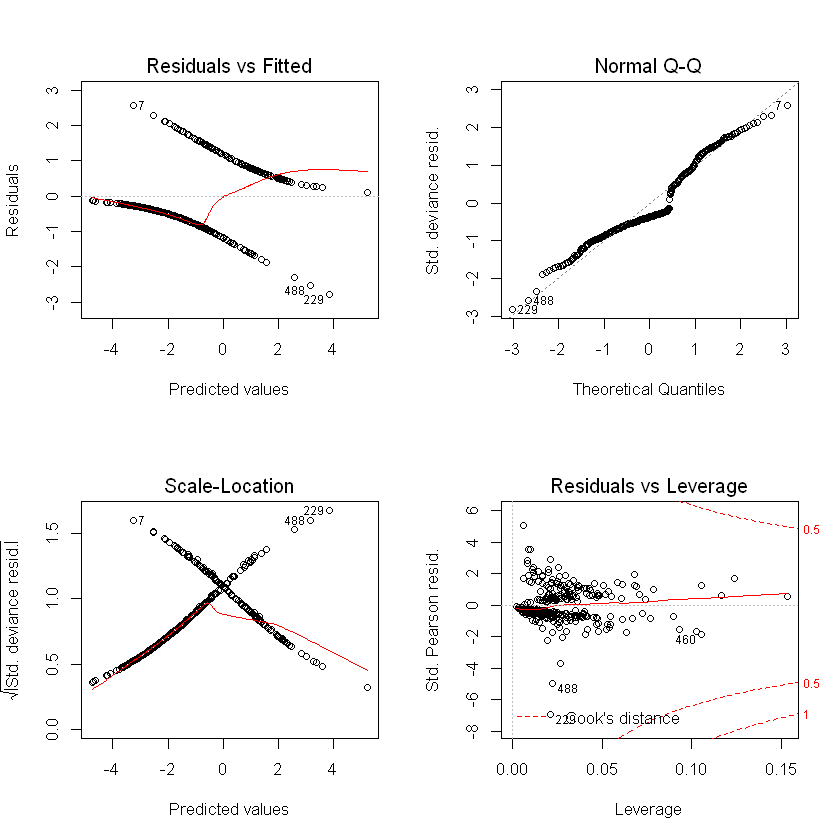

In [86]:
par(mfrow = c(2,2)); plot(glmod)

The plots look really weird. However, because we're using logistic regression instead of linear regression, the residuals do not have to follow a normal distribution, so these plots actually don't tell us much. So let's do some other diagnostics. As there are a large number of points, the deviance should follow a $\chi^2$ distribution if the model is a good fit.

In [117]:
pchisq(deviance(glmod), df.residual(glmod), lower = FALSE)

[1] 0.9243408

In [118]:
# Numbers taken from the Null deviance of the model
pchisq(498.1, 391, lower = FALSE)

[1] 0.0001921813

Because the p-value of the distribution is well above 0.05, we can conclude that the model fits sufficiently well. But keep in mind that this does not mean that the model is correct or that a simpler model would not fit as well. However, the null deviance has a very low p-value, so some of our predictors must be explaining some of the variance in the model. Now lets test the significant of the features.

In [119]:
drop1(glmod, test = "Chi")

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NA,344.0212,362.0212,NA,NA
pregnant,1,346.2355,362.2355,2.21425978,1.367406e-01
glucose,1,396.9505,412.9505,52.92928905,3.457748e-13
diastolic,1,344.0356,360.0356,0.01438939,9.045182e-01
triceps,1,344.4520,360.4520,0.43081252,5.115905e-01
insulin,1,344.4183,360.4183,0.39706742,5.286077e-01
bmi,1,350.8925,366.8925,6.87128684,8.759156e-03
diabetes,1,351.5805,367.5805,7.55922628,5.970362e-03
age,1,347.5497,363.5497,3.52851701,6.032172e-02


Here we see that all of the predictors are significant relative to the full model. Now lets check the dispersion of the model.

In [123]:
dispEst = sum(residuals(glmod, type = "pearson")^2/glmod$df.res) #estimate of dispersion parameter
dispEst

[1] 1.061657

The dispersion is slightly above 0, meaning that the value of the variance is slightly greater than the mean. We can adjust for this in the model summary.

In [124]:
summary(glmod, dispersion = dispEst)


Call:
glm(formula = test ~ ., family = binomial, data = pima)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7823  -0.6603  -0.3642   0.6409   2.5612  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.004e+01  1.255e+00  -8.003 1.22e-15 ***
pregnant     8.216e-02  5.711e-02   1.439  0.15025    
glucose      3.827e-02  5.943e-03   6.440 1.20e-10 ***
diastolic   -1.420e-03  1.219e-02  -0.116  0.90727    
triceps      1.122e-02  1.760e-02   0.637  0.52381    
insulin     -8.253e-04  1.346e-03  -0.613  0.53980    
bmi          7.054e-02  2.817e-02   2.504  0.01229 *  
diabetes     1.141e+00  4.404e-01   2.591  0.00958 ** 
age          3.395e-02  1.894e-02   1.793  0.07304 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1.061657)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 344.02  on 383  degrees of freedom
AIC: 362.02

Numb

### Problem B.2

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation. 

#### Develop a model for the rate of incidents, describing the effect of the important predictors.

In [87]:
library(MASS)
data(ships)

# Get rid of all the rows where service = 0
ships$service[ships$service == 0] <- NA
ships = na.omit(ships)

ships$year = factor(ships$year)
ships$period = factor(ships$period)

head(ships)

type,year,period,service,incidents
A,60,60,127,0
A,60,75,63,0
A,65,60,1095,3
A,65,75,1095,4
A,70,60,1512,6
A,70,75,3353,18


In [88]:
# If we are looking for rate of incidents, then want rate is incidents / service
glmodRate = glm(incidents ~ type + year + period + offset(log(service)), data = ships, family = poisson(link = "log"))
summary(glmodRate)

dp = sum(resid(glmodRate, type = "pearson")^2)/glmodRate$df.res
dp


Call:
glm(formula = incidents ~ type + year + period + offset(log(service)), 
    family = poisson(link = "log"), data = ships)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6768  -0.8293  -0.4370   0.5058   2.7912  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.40590    0.21744 -29.460  < 2e-16 ***
typeB       -0.54334    0.17759  -3.060  0.00222 ** 
typeC       -0.68740    0.32904  -2.089  0.03670 *  
typeD       -0.07596    0.29058  -0.261  0.79377    
typeE        0.32558    0.23588   1.380  0.16750    
year65       0.69714    0.14964   4.659 3.18e-06 ***
year70       0.81843    0.16977   4.821 1.43e-06 ***
year75       0.45343    0.23317   1.945  0.05182 .  
period75     0.38447    0.11827   3.251  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 146.328  on 33  degrees of freedom
Residual deviance:  38.695  on 25

[1] 1.69101

In [91]:
glmodRateNoType = glm(incidents ~ year + period + offset(log(service)), data = ships, family = poisson(link = "log"))
glmodRateNoYear = glm(incidents ~ type + period + offset(log(service)), data = ships, family = poisson(link = "log"))
glmodRateNoPeriod = glm(incidents ~ type + year + offset(log(service)), data = ships, family = poisson(link = "log"))

anova(glmodRateNoType, glmodRate, test = "Chisq")
anova(glmodRateNoYear, glmodRate, test = "Chisq")
anova(glmodRateNoPeriod, glmodRate, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
29,62.36534,NA,NA,NA
25,38.69505,4,23.67029,9.299568e-05


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
28,70.10294,NA,NA,NA
25,38.69505,3,31.40789,6.974977e-07


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
26,49.35519,NA,NA,NA
25,38.69505,1,10.66014,0.001094692


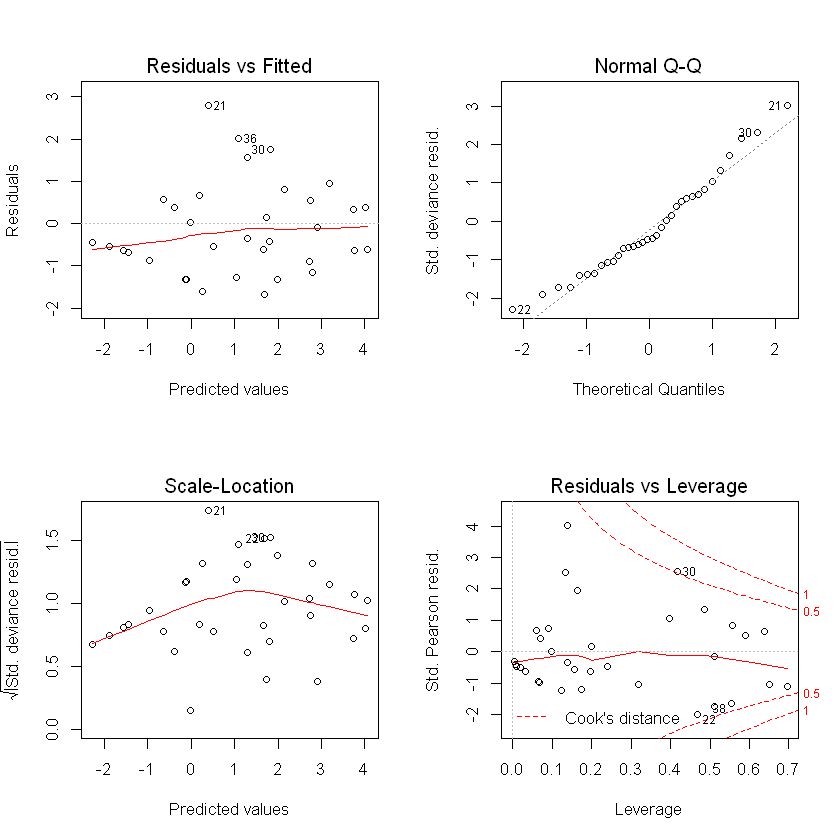

In [90]:
par(mfrow = c(2,2)); plot(glmodRate)

From the code above, we created a rate model for the number of incidents per year. We then tested it against reduced models with fewer parameters, but in each case the p-value of the corresponding ANOVA test was less than 0.05, so we had to assert that there was a significant difference between the full and reduce models, and continued to use the full model. From the plots, the model looks OK. There is some deviations in the tails of the QQ plot and there is some change in spread of the Residuals vs Fitted plot, but overall it looks decent.

### Problem B.4

The morley data can be  viewed as a randomized block experiment with Run as the treatment factor and Expt as the blocking factor. 

#### Is there a difference between runs and what efficiency is gained  by blocking? (Make sure factors are stored in R as factors!)

In [87]:
data(morley)
head(morley)

,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850
